# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [23]:
import pandas as pd
alarm_survey = pd.read_excel('Alarm Survey Data.xlsx')
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [2]:
alarm_survey.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [26]:
# Converting Data Types (i.e. alarm_rating column)
alarm_survey.alarm_rating = pd.to_numeric(alarm_survey.alarm_rating.astype('str').str.replace('stars', ''))
alarm_survey.alarm_rating

0       5
1       3
2       1
3       4
4       3
       ..
6428    5
6429    4
6430    3
6431    3
6432    1
Name: alarm_rating, Length: 6433, dtype: int64

## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [27]:
alarm_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


In [28]:
# see the rows with missing data
alarm_survey[alarm_survey.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4
18,19,38,2.0,lightly active,NaN,1,5
23,24,24,2.0,very active,NaN,1,5
26,27,25,2.0,lightly active,NaN,1,2
28,29,29,2.0,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3
6319,6320,44,2.0,lightly active,NaN,0,3
6375,6309,32,3.0,light,NaN,0,3
6377,6311,30,2.0,very active,NaN,0,3


In [50]:
# look at the sleep quality values
alarm_survey.sleep_quality.value_counts(dropna=True)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: count, dtype: int64

In [35]:
# update sleep quality NaNs to 1
alarm_survey.sleep_quality.fillna(2, inplace=True)

C:\Users\Nil Saha\AppData\Local\Temp\ipykernel_27112\698580984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alarm_survey.sleep_quality.fillna(2, inplace=True)


In [49]:
# sleep quality values
alarm_survey.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: count, dtype: int64

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [51]:
# check the numerical columns
alarm_survey.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.110835,1.145811,2.955075
std,1856.007409,7.472048,1.432192,0.963415,1.599481,1.101363
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000,5.000000


In [52]:
# look into number of children -- it just means 5+ kids, leave as is
alarm_survey.number_of_children.value_counts()

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: count, dtype: int64

In [53]:
# check the categorical columms
alarm_survey.activity_level.value_counts()

activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [70]:
# map the lightly active values to one value

alarm_survey['activity_level'] = alarm_survey['activity_level'].replace({
    'light_activity': 'lightly active',
    'light': 'lightly active'
})
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [71]:
# check the categorical columms
alarm_survey.activity_level.value_counts()

activity_level
lightly active    3314
active            2450
very active        669
Name: count, dtype: int64

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [74]:
# check for duplicate values
alarm_survey[alarm_survey.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2.0,active,5.0,0,3
6367,6301,27,2.0,lightly active,4.0,0,2
6368,6302,41,3.0,lightly active,5.0,0,2
6369,6303,25,0.0,lightly active,5.0,0,5
6370,6304,25,1.0,lightly active,5.0,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [95]:
# drop duplicates
alarm_survey.drop_duplicates()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

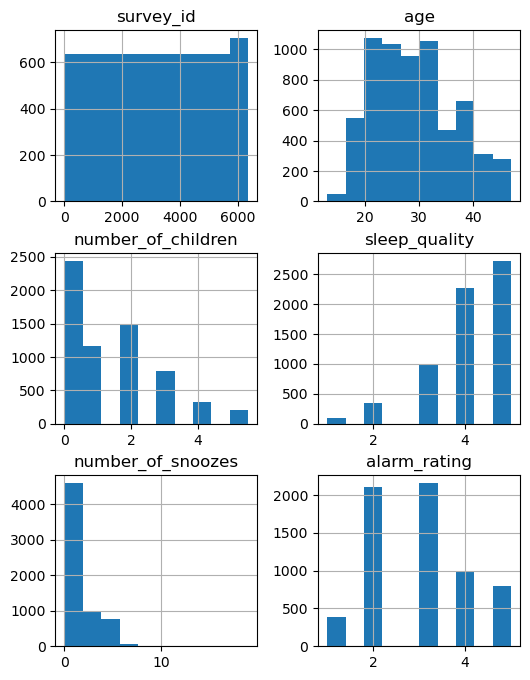

In [81]:
# look at the histograms of all numeric columns
alarm_survey.hist(figsize = (6,8));

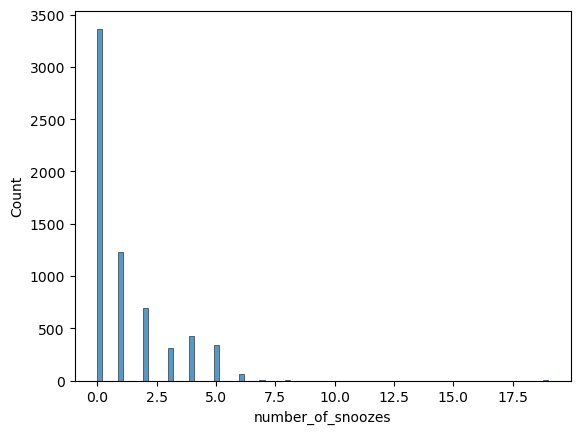

In [85]:
# look at the histogram of the number of snoozes
import seaborn as sns
sns.histplot(alarm_survey.number_of_snoozes);

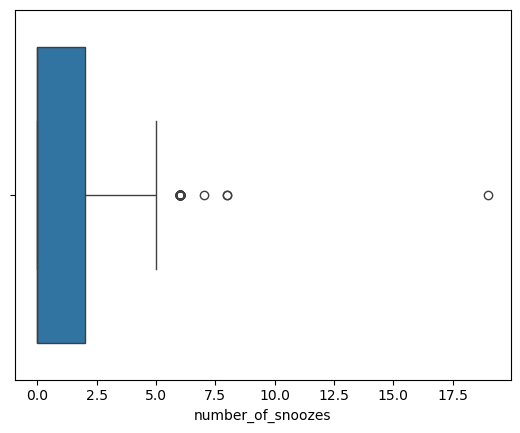

In [86]:
# look at the boxplot of the number of snoozes
sns.boxplot(x=alarm_survey.number_of_snoozes);

In [87]:
# look into number of snoozes
alarm_survey.number_of_snoozes.value_counts()

number_of_snoozes
0     3367
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [88]:
# let's only remove the extreme outlier
alarm_survey = alarm_survey[alarm_survey.number_of_snoozes < 19]
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [89]:
# look into number of snoozes
alarm_survey.number_of_snoozes.value_counts()

number_of_snoozes
0    3367
1    1229
2     693
4     427
5     345
3     309
6      59
8       2
7       1
Name: count, dtype: int64

## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [90]:
# see the rows with missing data
alarm_survey[alarm_survey.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [ ]:
alarm_survey[alarm_survey.isna().any(axis=1)]

In [91]:
# check for inconsistent text
alarm_survey.activity_level.value_counts()

activity_level
lightly active    3313
active            2450
very active        669
Name: count, dtype: int64

In [101]:
# check for outliers
alarm_survey.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6432.000000,6432.000000,6432.000000,6432.000000,6432.000000,6432.000000
mean,3216.685634,29.070740,1.395678,4.110697,1.143035,2.955068
std,1855.896865,7.471574,1.432295,0.963426,1.584033,1.101448
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.750000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3217.500000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4825.250000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,8.000000,5.000000


In [103]:
# first round of data cleaning is complete!
alarm_survey.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [ ]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [106]:
import pandas as pd

pen_sales = pd.read_excel('Pen Sales Data.xlsx')
pen_sales.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [110]:
pen_sales.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [111]:
# create a new column using addition
pen_sales['Total Spend'] = pen_sales['Pen Cost'] + pen_sales['Shipping Cost']
pen_sales.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [114]:
#To see if there is any free shipping
pen_sales['Shipping Cost'].value_counts()

Shipping Cost
1.99    9
2.99    7
0.00    6
4.99    3
Name: count, dtype: int64

In [117]:
# create a new column using conditional logic

import numpy as np
pen_sales['Free Shipping'] = np.where(pen_sales['Shipping Cost'] == 0, 0, 1)
pen_sales.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,1
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,0
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,1
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,1
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,1


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [ ]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [119]:
# apply a datetime calculation
pen_sales['Delivery Time'] = pen_sales['Delivery Date'] - pen_sales['Purchase Date']
pen_sales.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,1,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,0,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,1,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,1,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,1,2 days


In [121]:
# What were the average days from purchase to delivery?
pen_sales['Delivery Time'].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [ ]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [129]:
# split a column into multiple columns
reviews = pen_sales.Review.str.split('|')
reviews.head()

0    [DoodleWithMe, I love the way this pen writes,...
1    [ScribbleMaster, The classic Sharpie marker ha...
2    [PenPalForever, The retractable ballpoint pen ...
3    [TheWriteWay, This gel pen has a comfortable g...
4    [PenAndPaperPerson, The rollerball pen has a s...
Name: Review, dtype: object

In [133]:
# put columns back into original dataframe
pen_sales[['User Name', 'Review Text']] = pd.DataFrame(reviews.to_list())
pen_sales.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,1,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,0,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,1,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,1,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,1,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."


In [134]:
# find if a field contains particular words
pen_sales['Leak or Spill'] = pen_sales.Review.str.contains('leak|spill', regex=True)
pen_sales.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,1,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,0,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,1,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,1,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,1,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
